# Measuring Income Inequality

## Exercise 1 ##

Here we import essential Python libraries and loading income data for analysis.

In [17]:
import numpy as np
from matplotlib import pyplot as plt
from ineqpy.inequality import gini

income_data = np.loadtxt(
    "https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/us_household_incomes.txt"
)

## Exercise 2 ##

Upon plotting the income data(in its entirety), it’s evident that the distribution is right-skewed. This means that there are more households with lower incomes compared to higher incomes, which is a characteristic of income inequality. The skewed shape of the histogram points out that income inequality is relatively high in the United States.

(array([8.77542e+05, 4.35030e+04, 1.01710e+04, 1.92100e+03, 3.98000e+02,
        1.17000e+02, 2.90000e+01, 8.00000e+00, 4.00000e+00, 2.00000e+00]),
 array([ -16942. ,  225842.5,  468627. ,  711411.5,  954196. , 1196980.5,
        1439765. , 1682549.5, 1925334. , 2168118.5, 2410903. ]),
 <BarContainer object of 10 artists>)

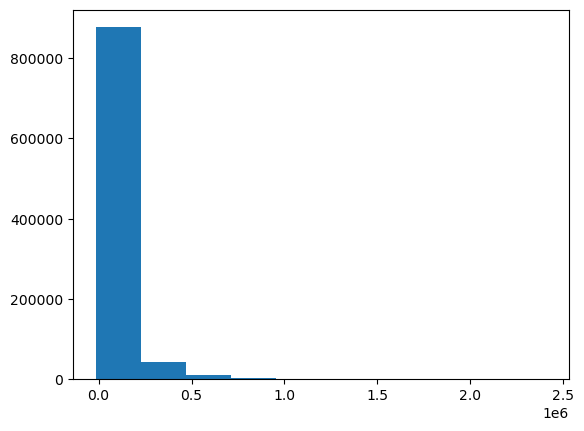

In [18]:
plt.hist(income_data)

## Exercise 3 ##

Limiting the income range to households making less than $500,000 still exhibits a noticeable right-skew in the income distribution. This indicates that income inequality is not solely attributable to extreme high earners but is a characteristic that extends across various income levels.

In [19]:
income_data_below500K = income_data[income_data < 500000]

(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

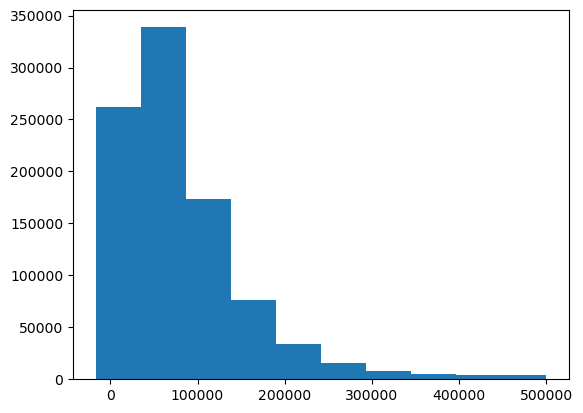

In [20]:
plt.hist(income_data_below500K)

## Exercise 4 ##

The Gini Index for income inequality in the United States, calculated using the gini function above, is approximately 41.50.

In [21]:
ex4_share_below_poverty = len(income_data[income_data < 20000]) / len(income_data)

In [22]:
ex4_gini = gini(income_data)
print(round(ex4_gini,2))

0.48


## Exercise 5 ##

In the Country Ranking for GINI index by World Bank estimate, the US has a GINI Index of 41.50 in 2019, sitting at 46th place in descending order of inqeuality (out of 162 countries ranked). 

This is roughly what we expected, given that the US is not known for its wealth redistribution programs or other initiatives to tackle inequality (particularly so for an OECD country).

## Exercise 6 ##

Comparing the Gini Index values, we find that **Policy B** (Gini ≈ 0.2136) has reduced income inequality more than **Policy A** (Gini ≈ 0.2472). 

Based on these calculations, our recommendation to the President is that implementing **Policy B** appears to be more effective in reducing income inequality, as it results in a lower Gini Index compared to **Policy A.**

In [23]:
ex6_income_policy_a = income_data[income_data < 40000] + 5000
ex6_income_policy_b = income_data[income_data < 30000] + 7000

results = {
    "ex4_share_below_poverty": ex4_share_below_poverty,
    "ex4_gini": ex4_gini,
    "ex6_gini_policy_a": gini(ex6_income_policy_a),
    "ex6_gini_policy_b": gini(ex6_income_policy_b),
    "ex6_gini_which_reduced_more": "Policy B",
}
print(results)

{'ex4_share_below_poverty': 0.14711442173300704, 'ex4_gini': 0.48109255468791856, 'ex6_gini_policy_a': 0.2471580048356745, 'ex6_gini_policy_b': 0.21363781959746908, 'ex6_gini_which_reduced_more': 'Policy B'}


## Exercise 7 ##

In [24]:
ex7_income_policy_c = income_data[income_data > 250000] * 0.95
results["ex7_gini_policy_c"] = gini(ex7_income_policy_c)
print(results)

{'ex4_share_below_poverty': 0.14711442173300704, 'ex4_gini': 0.48109255468791856, 'ex6_gini_policy_a': 0.2471580048356745, 'ex6_gini_policy_b': 0.21363781959746908, 'ex6_gini_which_reduced_more': 'Policy B', 'ex7_gini_policy_c': 0.20253166782390997}


 ## Exercise 8 ##

In [25]:
tax_generated = sum(income_data[income_data > 250000] * 0.05)
results["ex8_revenue_raised"] = tax_generated
print(results)

{'ex4_share_below_poverty': 0.14711442173300704, 'ex4_gini': 0.48109255468791856, 'ex6_gini_policy_a': 0.2471580048356745, 'ex6_gini_policy_b': 0.21363781959746908, 'ex6_gini_which_reduced_more': 'Policy B', 'ex7_gini_policy_c': 0.20253166782390997, 'ex8_revenue_raised': 929623340.8499994}


## Exercise 9 ##

In [26]:
results["ex9_transfers"] = tax_generated / len(income_data[income_data < 30000])
print(results)

{'ex4_share_below_poverty': 0.14711442173300704, 'ex4_gini': 0.48109255468791856, 'ex6_gini_policy_a': 0.2471580048356745, 'ex6_gini_policy_b': 0.21363781959746908, 'ex6_gini_which_reduced_more': 'Policy B', 'ex7_gini_policy_c': 0.20253166782390997, 'ex8_revenue_raised': 929623340.8499994, 'ex9_transfers': 4208.230382379833}


## Exercise 10 ##

In [27]:
ex10_income_data = income_data.copy()
ex10_income_data[ex10_income_data > 250000] = (
    ex10_income_data[ex10_income_data > 250000] * 0.95
)
ex10_income_data[ex10_income_data < 30000] = (
    ex10_income_data[ex10_income_data < 30000] + results["ex9_transfers"]
)

results["ex10_gini_policy_d"] = gini(ex10_income_data)

## Exercise 11 ##

In [28]:
ex11_income_data = income_data.copy()
ex11_income_data[ex11_income_data > 250000] = (
    ex11_income_data[ex11_income_data > 250000] * 0.95
)
ex11_income_data[ex11_income_data < 40000] = ex11_income_data[
    ex11_income_data < 40000
] + (tax_generated / len(ex11_income_data[ex11_income_data < 40000]))

results["ex11_gini_policy_e"] = gini(ex11_income_data)

## Exercise 12 ##

***INSERT POLICY RECOMMENDATION HERE***

In [29]:
results["ex12_policy_recommendation"] = "Policy D"
print(results)

{'ex4_share_below_poverty': 0.14711442173300704, 'ex4_gini': 0.48109255468791856, 'ex6_gini_policy_a': 0.2471580048356745, 'ex6_gini_policy_b': 0.21363781959746908, 'ex6_gini_which_reduced_more': 'Policy B', 'ex7_gini_policy_c': 0.20253166782390997, 'ex8_revenue_raised': 929623340.8499994, 'ex9_transfers': 4208.230382379833, 'ex10_gini_policy_d': 0.461669005702055, 'ex11_gini_policy_e': 0.4626486196305247, 'ex12_policy_recommendation': 'Policy D'}


In [30]:
assert set(results.keys()) == {
    "ex4_share_below_poverty",
    "ex4_gini",
    "ex6_gini_policy_a",
    "ex6_gini_policy_b",
    "ex6_gini_which_reduced_more",
    "ex7_gini_policy_c",
    "ex8_revenue_raised",
    "ex9_transfers",
    "ex10_gini_policy_d",
    "ex11_gini_policy_e",
    "ex12_policy_recommendation",
}